<a href="https://colab.research.google.com/github/dkd99/Cardiovascular-Risk-prediction/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables

> Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description

> Demographic:

> • Sex: male or female("M" or "F")

> • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

>Behavioral

> • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

> • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

> Medical( history)

> • BP Meds: whether or not the patient was on blood pressure medication (Nominal)


> • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

> • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

> • Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

> • Tot Chol: total cholesterol level (Continuous)

> • Sys BP: systolic blood pressure (Continuous)

> • Dia BP: diastolic blood pressure (Continuous)

> • BMI: Body Mass Index (Continuous)

> • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

> • Glucose: glucose level (Continuous)

> Predict variable (desired target)

> • 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("/content/drive/MyDrive/csv files/data_cardiovascular_risk.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [55]:
df.shape

(3390, 17)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [57]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [58]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [59]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [60]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [61]:
continous_features=['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [62]:
nominal_features=[i for i in df.columns.tolist() if i not in (continous_features+['id']) ]

In [63]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [64]:
numerical_features=df.describe().columns.tolist()

In [65]:
for i in nominal_features:
  print(f'value count for {i} is :\n',df[i].value_counts())

value count for education is :
 1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
value count for sex is :
 F    1923
M    1467
Name: sex, dtype: int64
value count for is_smoking is :
 NO     1703
YES    1687
Name: is_smoking, dtype: int64
value count for BPMeds is :
 0.0    3246
1.0     100
Name: BPMeds, dtype: int64
value count for prevalentStroke is :
 0    3368
1      22
Name: prevalentStroke, dtype: int64
value count for prevalentHyp is :
 0    2321
1    1069
Name: prevalentHyp, dtype: int64
value count for diabetes is :
 0    3303
1      87
Name: diabetes, dtype: int64
value count for TenYearCHD is :
 0    2879
1     511
Name: TenYearCHD, dtype: int64


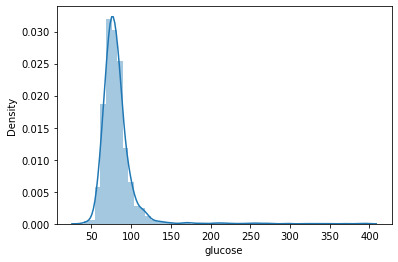

In [66]:
sns.distplot(df['glucose'])

In [67]:
df['glucose'].isnull().sum()

304

In [68]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [69]:
df['glucose'].isnull().sum()

0

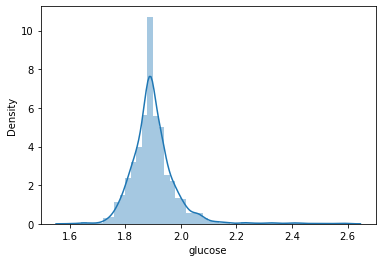

In [70]:
sns.distplot(np.log10(df['glucose']))

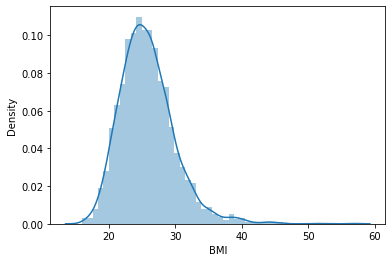

In [71]:
sns.distplot(df['BMI'])

In [72]:
df['BMI'].isnull().sum()

14

In [73]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [74]:
df['BMI'].isnull().sum()

0

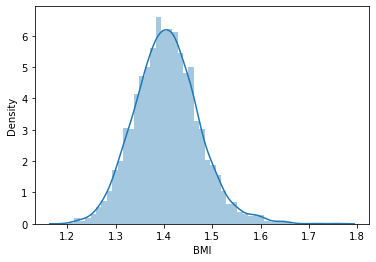

In [75]:
sns.distplot(np.log10(df['BMI']))

In [76]:
df['glucose'].isnull().sum()

0

In [77]:
len(df[df['cigsPerDay']==0]['cigsPerDay'])

1703

In [78]:
len(df[df['cigsPerDay']!=0]['cigsPerDay'])

1687

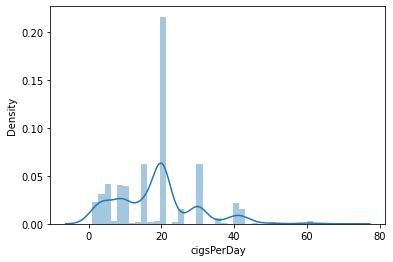

In [79]:
sns.distplot(df[df['cigsPerDay']!=0]['cigsPerDay'])

In [80]:
df['cigsPerDay']=df['cigsPerDay'].fillna(0)

In [81]:
df['cigsPerDay'].isnull().sum()

0

In [82]:
df[df['is_smoking']=='NO']['cigsPerDay'].mean()

0.0

In [83]:
df['education']=df['education'].fillna(1)

In [84]:
df['education'].isnull().sum()

0

In [85]:
df['BPMeds']=df['BPMeds'].fillna(0.0)

In [86]:
df['BPMeds'].isnull().sum()

0

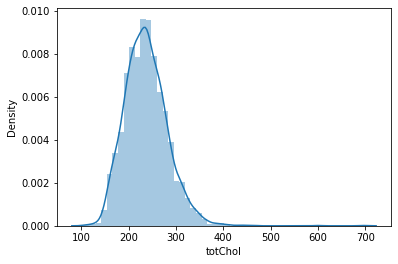

In [87]:
sns.distplot(df['totChol'])

In [88]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())

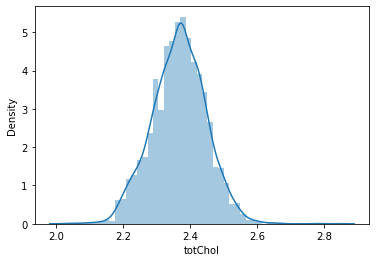

In [89]:
sns.distplot(np.log10(df['totChol']))

In [90]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())

In [91]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

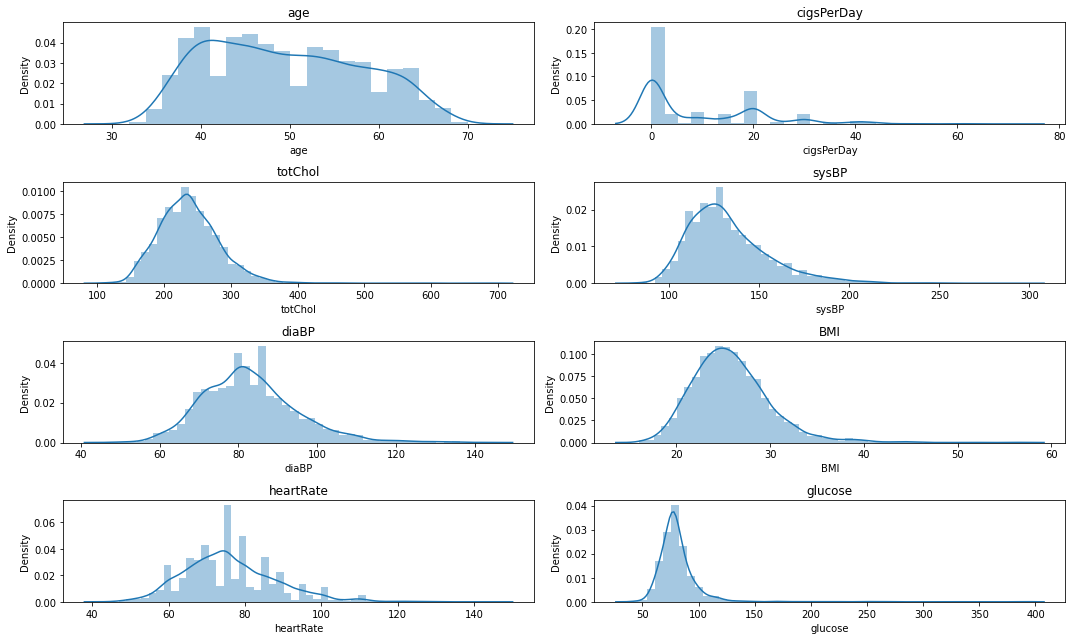

In [92]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()
 


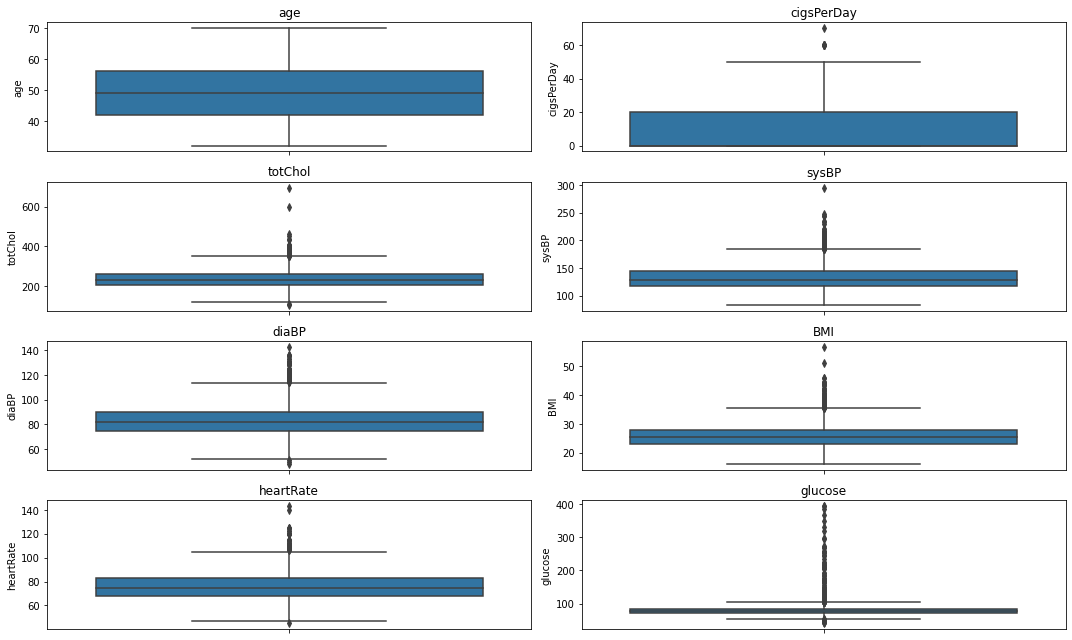

In [93]:
n=1
plt.figure(figsize=(15,9))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=df[i])
  plt.title(i)
  plt.tight_layout()

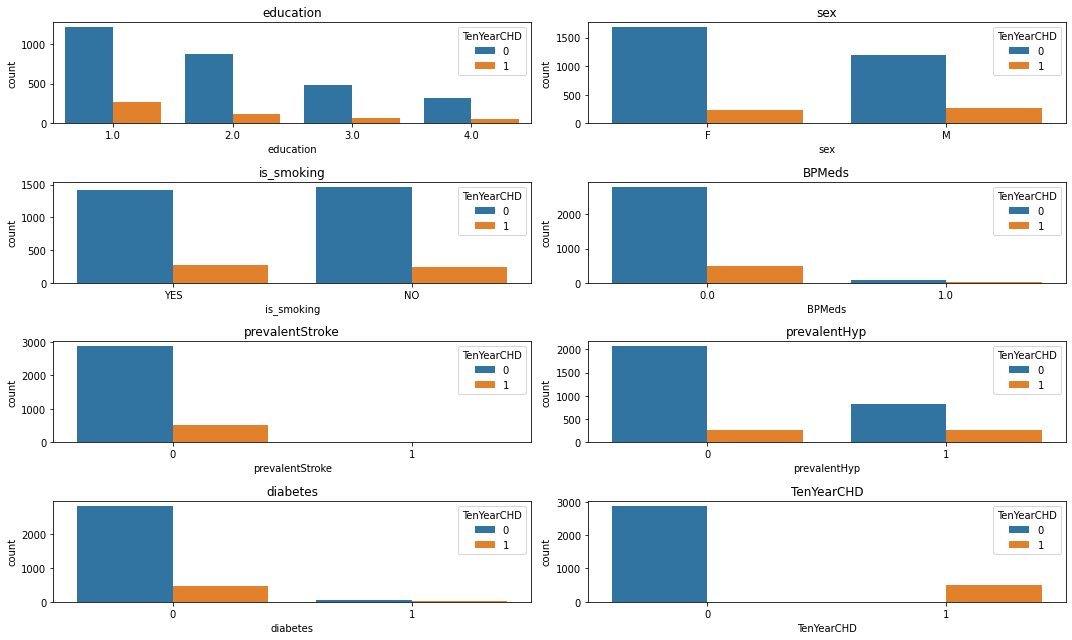

In [110]:
n=1
plt.figure(figsize=(15,9))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.countplot(x=i,hue='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

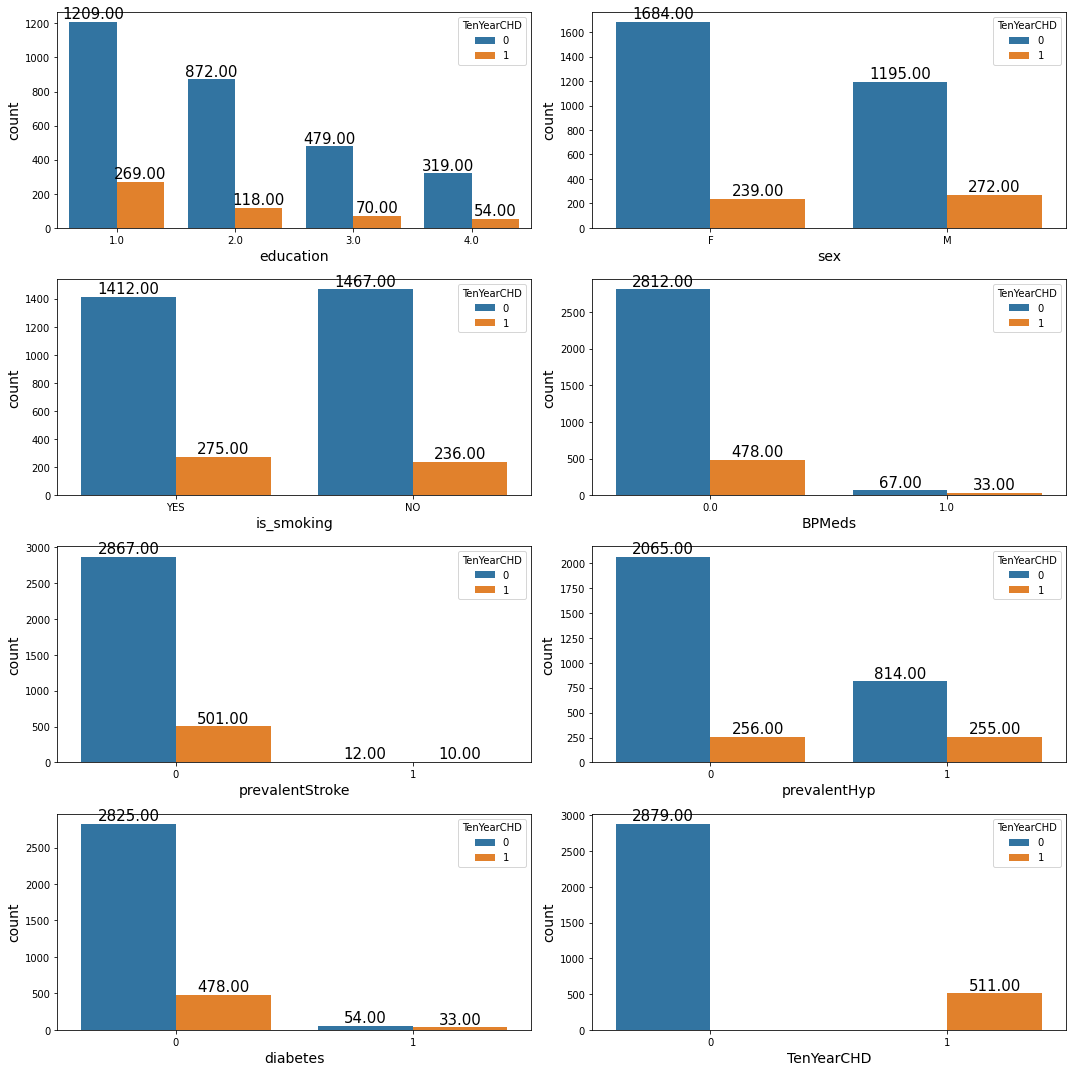

In [116]:
n=1
# Defining the plot size
plt.figure(figsize=(15, 15))
for i in nominal_features:
  plt.subplot(4,2,n)
  n=n+1
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  plots = sns.countplot(x=i, hue="TenYearCHD", data=df)

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count', size=14)
  plt.tight_layout()


<Figure size 1080x1080 with 0 Axes>

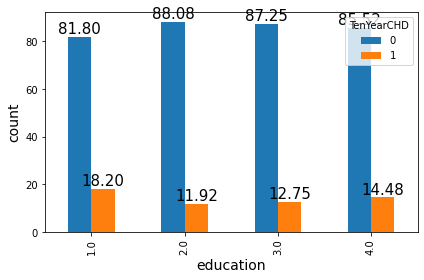

<Figure size 1080x1080 with 0 Axes>

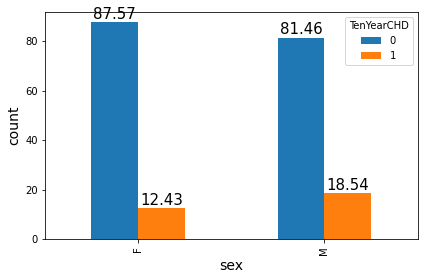

<Figure size 1080x1080 with 0 Axes>

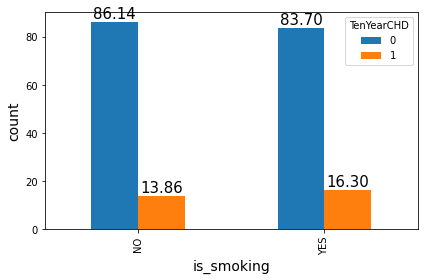

<Figure size 1080x1080 with 0 Axes>

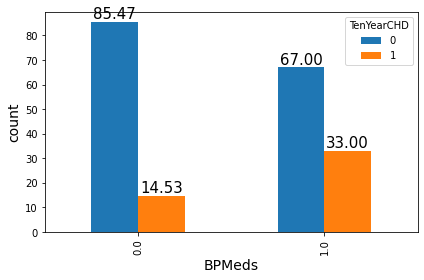

<Figure size 1080x1080 with 0 Axes>

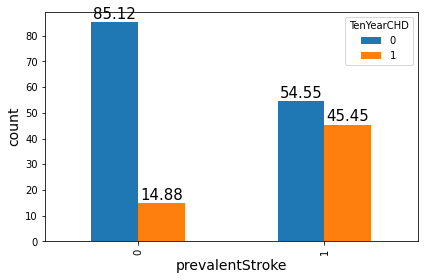

<Figure size 1080x1080 with 0 Axes>

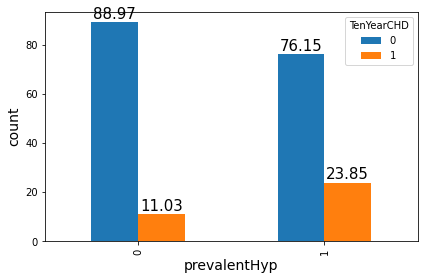

<Figure size 1080x1080 with 0 Axes>

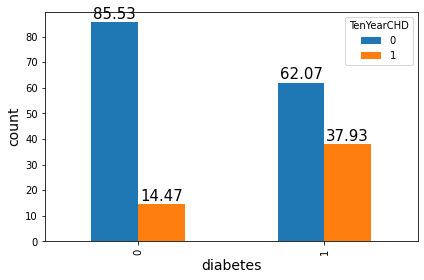

In [137]:
for i in nominal_features[:7]:
  
  plt.figure(figsize=(15, 15))
  
  

  # Defining the values for x-axis, y-axis
  # and from which dataframe the values are to be picked
  totals = df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').sum(axis=1)
  plots = ((df[[i,'TenYearCHD']].groupby([i,'TenYearCHD']).size().unstack('TenYearCHD').T/totals).T*100).plot(kind='bar')

  # Iterrating over the bars one-by-one
  for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
	  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

  # Setting the label for x-axis
  plt.xlabel(i, size=14)

  # Setting the label for y-axis
  plt.ylabel('count', size=14)
  plt.tight_layout()


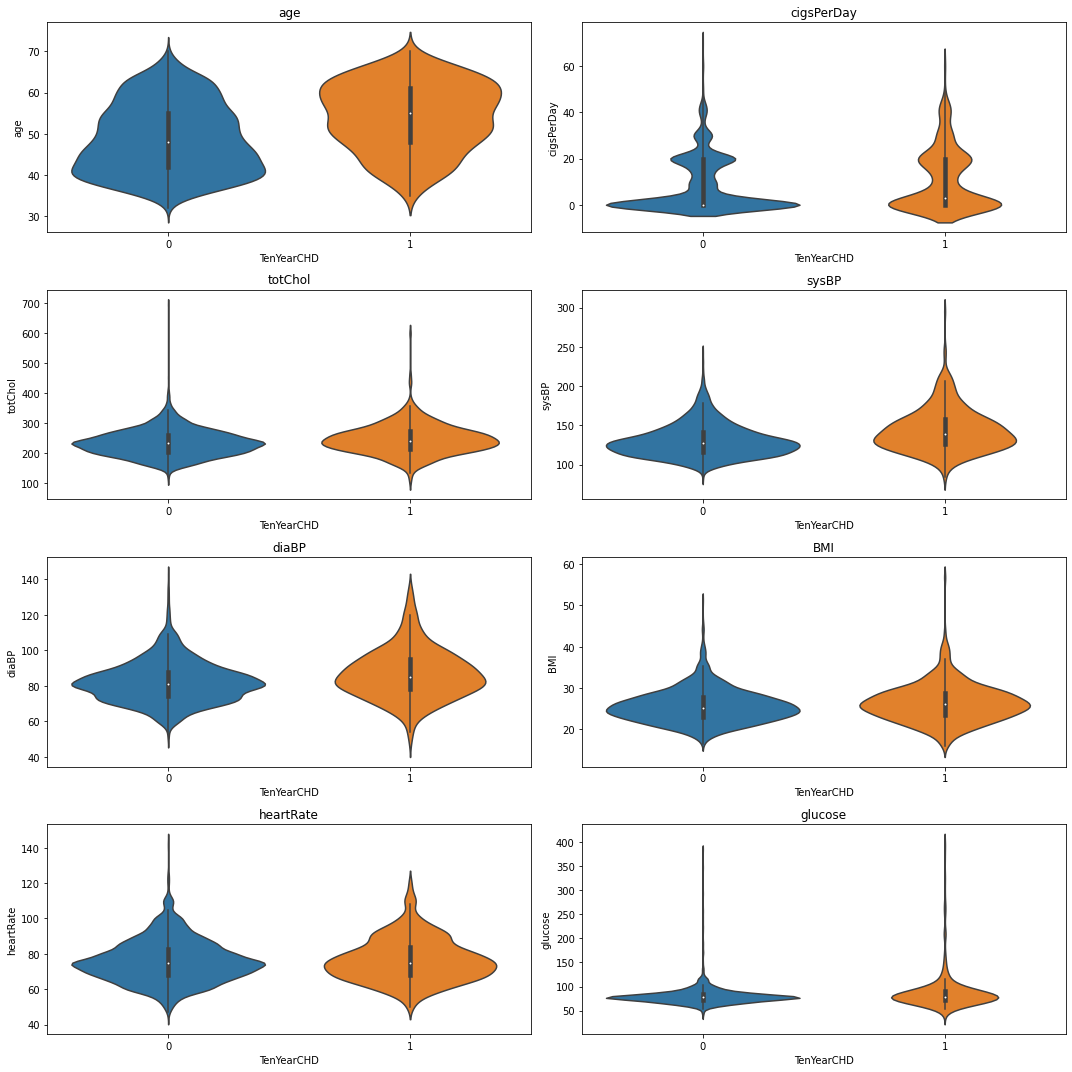

In [136]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.violinplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

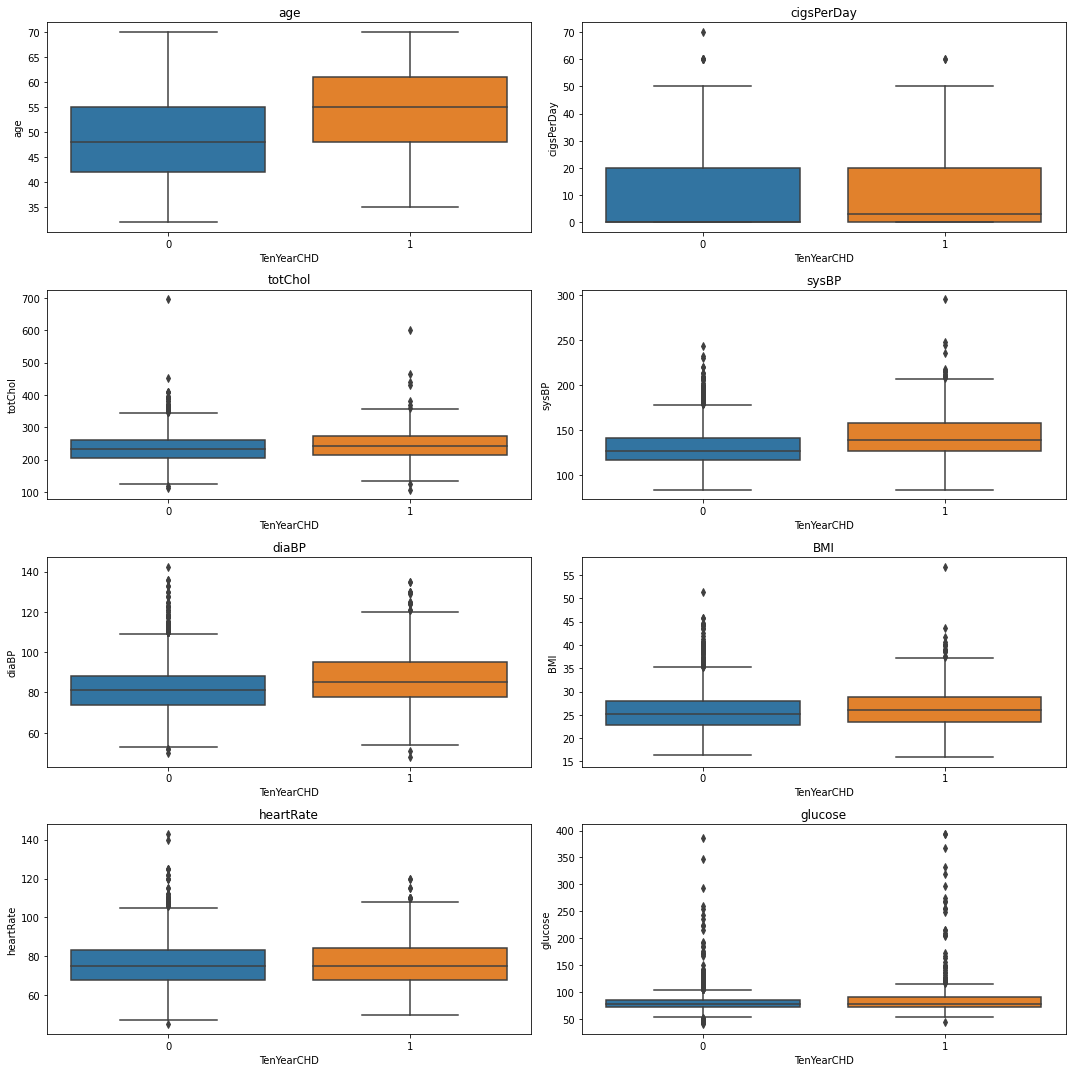

In [138]:
n=1
plt.figure(figsize=(15,15))
for i in continous_features:
  plt.subplot(4,2,n)
  n=n+1
  sns.boxplot(y=i,x='TenYearCHD',data=df)
  plt.title(i)
  plt.tight_layout()

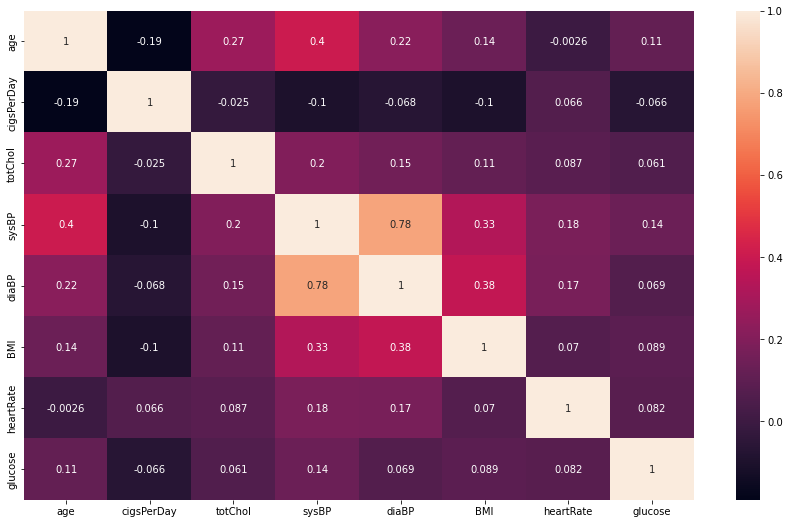

In [139]:
plt.figure(figsize=(15,9))
sns.heatmap(df[continous_features].corr(),annot=True)

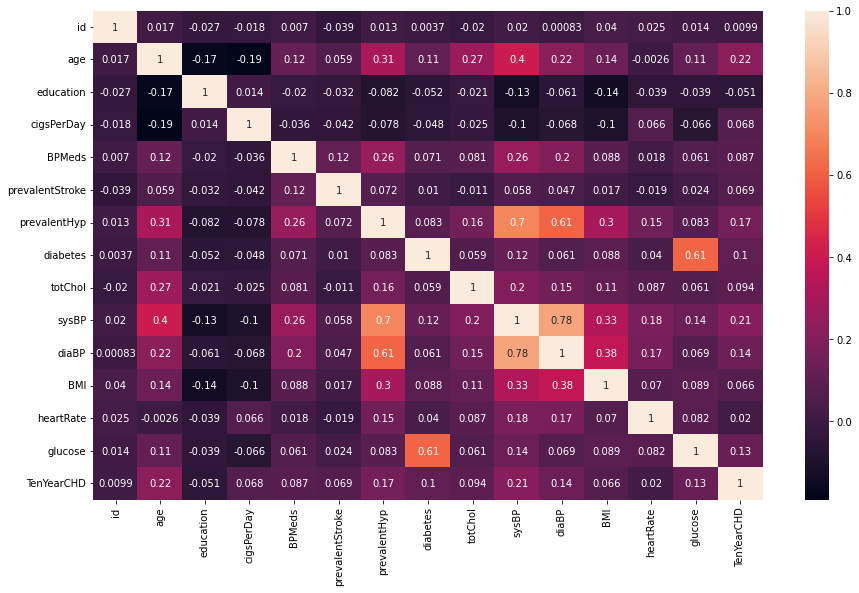

In [141]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [144]:
continous_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [143]:
nominal_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [142]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [145]:
df.drop(columns=['sysBP','diabetes','prevalentHyp'],axis=1,inplace=True)

In [146]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [150]:
df['sex']=df['sex'].apply(lambda x:1 if x=='M' else 1)
df['is_smoking']=df['is_smoking'].apply(lambda x:1 if x=='YES' else 0)

In [152]:
df.drop(columns=['is_smoking'],axis=1,inplace=True)

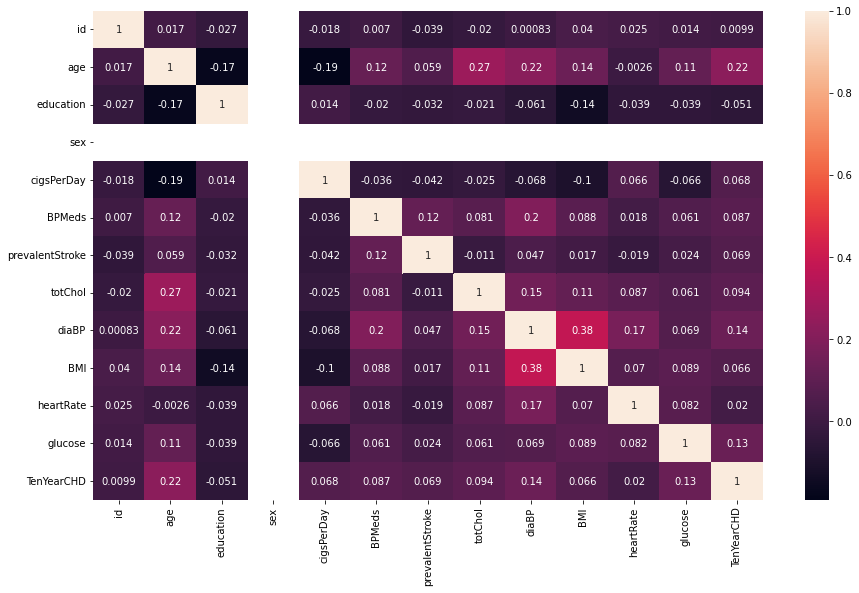

In [153]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']
Y=df